<a href="https://colab.research.google.com/github/labewoor/Coding-Activities/blob/master/CNN_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**An Electro Cardio Gram (ECG) is simple test that can be used to check your heart rhythm and electrical activity.
Classes = [N:0, S:1, V:2, F:3, Q:4] N: Non-ectopic beats (Normal Beats), - S: Supraventricular ectopic beats , 
V - Ventricular ectopic beats, F - Fusion Beats , Q - Unknown Beats**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Header=Nne as img data and o have column 
train_data=pd.read_csv("/content/drive/MyDrive/Medical Data/ECG/mitbih_train.csv",header=None)
test_data=pd.read_csv("/content/drive/MyDrive/Medical Data/ECG/mitbih_test.csv",header=None)

In [ ]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481667,0.526667,0.543333,0.563333,0.581667,0.588333,0.600000,0.603333,0.613333,0.6216

**EDA**

In [7]:
train_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [8]:
train_data.iloc[:,187].unique()

array([0., 1., 2., 3., 4.])

In [ ]:
#output data in float form we have to convert to int for appropriate labelling
#float denotes continuous data but it should be discrete

In [9]:
train_data[187] = train_data[187].astype('int')
test_data[187] = test_data[187].astype('int')

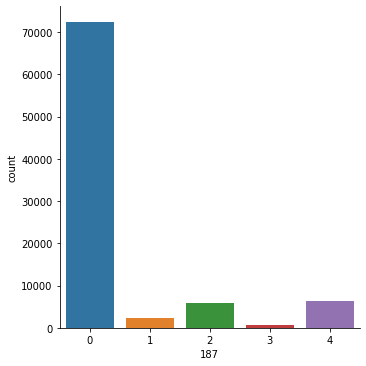

In [10]:
#Display the counts of each class. Most of the data is biased belong to class normal
sns.catplot(x = 187, kind = 'count', data = train_data)

In [11]:
train_data[187].value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

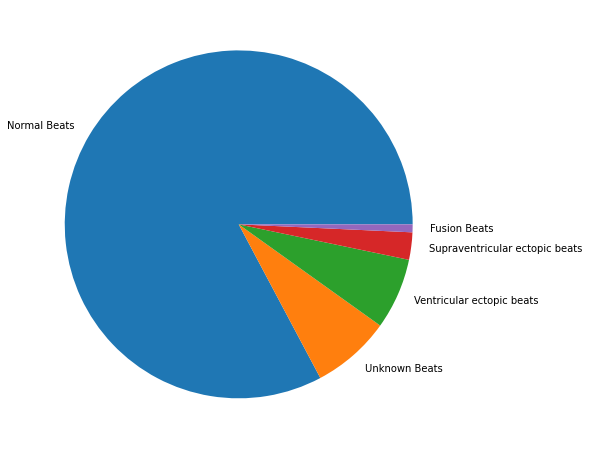

In [12]:
plt.figure(figsize=(13,8))
plt.pie(train_data[187].value_counts(),labels=['Normal Beats','Unknown Beats', 'Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats' ])
plt.show()

**Printing like donut for pie**

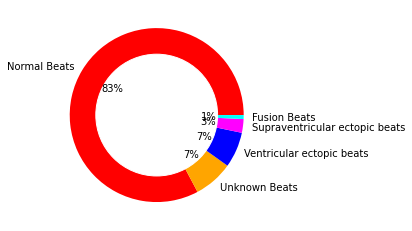

In [13]:
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_data[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats',
                                                'Fusion Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


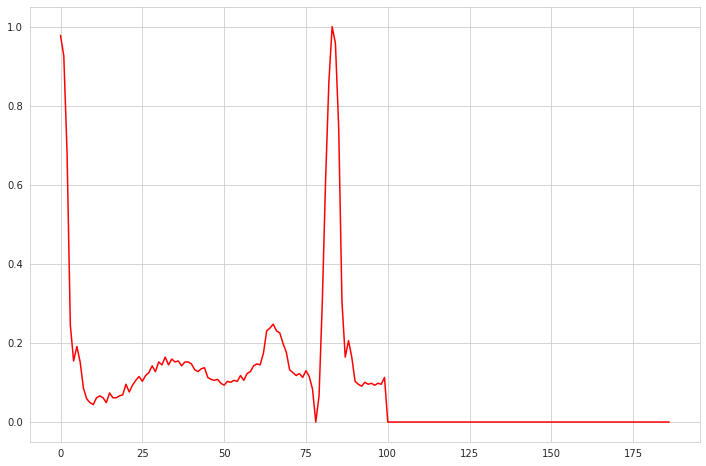

In [14]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red')
plt.show()

In [15]:
#Splitting data into different classes
df_1 = train_data[train_data[187] == 1]
df_2 = train_data[train_data[187] == 2]
df_3 = train_data[train_data[187] == 3]
df_4 = train_data[train_data[187] == 4]

**Compare different heartbeats**

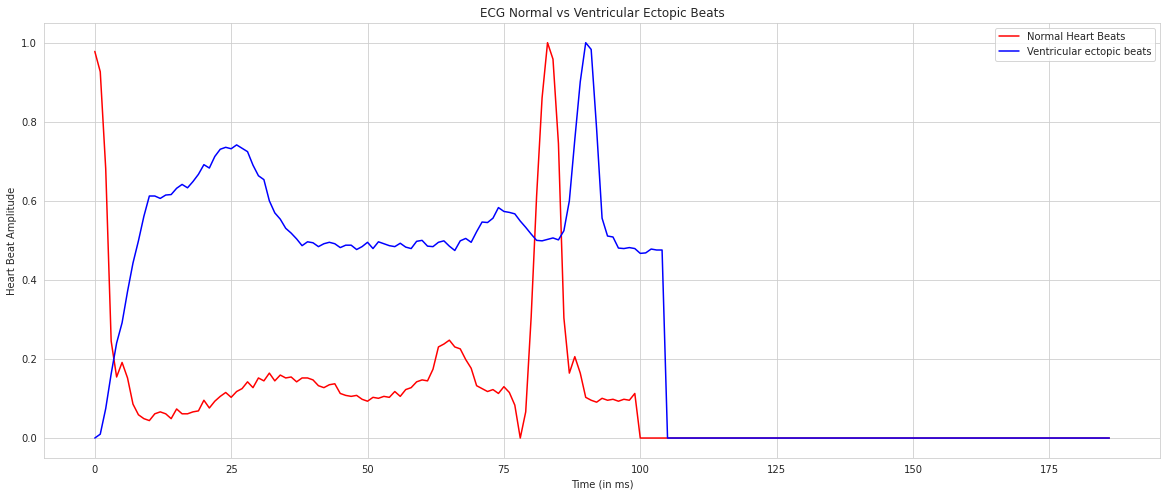

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_2.iloc[0, 0:187], color = 'blue', label = 'Ventricular ectopic beats')
plt.title("ECG Normal vs Ventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

**Data Augmetation**

In [17]:
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)


In [18]:
# select random 20000 samples from class 0 samples 
df_0 = train_data[train_data[187] == 0].sample(n = 20000, random_state = 123)

In [19]:
# merge all dataframes to create new train samples
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

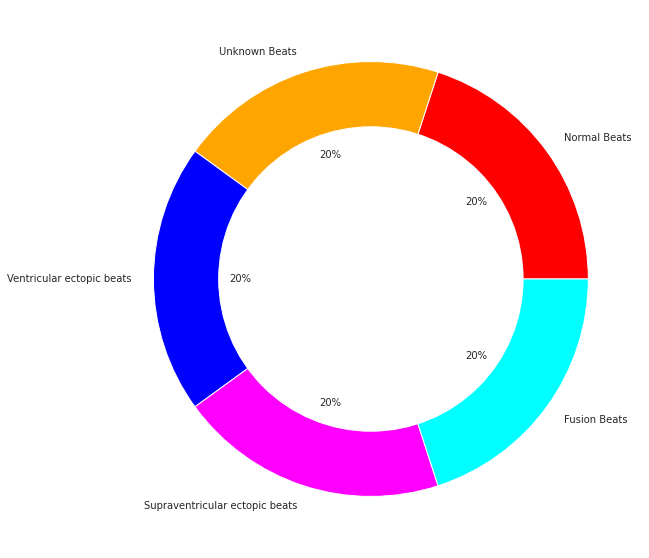

In [20]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_df[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats',
                                                'Fusion Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [21]:
# target Y
target_train = train_df[187]
target_test = test_data[187]

In [22]:
# convert integer values into categorical one hot encoding 
# 1 - [0, 1, 0, 0, 0]
# 4 - [0, 0, 0, 0, 1]
from keras.utils.np_utils import to_categorical
y_train = to_categorical(target_train)

y_test = to_categorical(target_test)

X_train = train_df.iloc[:, :-1].values
X_test = test_data.iloc[:, :-1].values


In [ ]:
#In order to work with CNN dimensionality is imp so reshaping necessary

In [23]:
# For Conv1D dimentionality must be 187x1 where 187 = number of features , 1 = 1D Dimentionality of Data
X_train = X_train.reshape( len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape( len(X_test), X_test.shape[1], 1)


In [24]:
from keras.models import Sequential
# For F.C. layer(Fully Connected)
from keras.layers import Dense
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam
# Avoid overfitting by normalizing samples 
from keras.layers.normalization import BatchNormalization



In [27]:
def build_model():
    model = Sequential()
    # Filters = Units in Dense Total number of Neurons
    # Padding = 'same' , zero-padding, Add zero pixels all around input data
    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same', input_shape = (187, 1)))
    # Normalization to avoid overfitting
    model.add(BatchNormalization())
    # Pooling 
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    model.add(Conv1D( filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    # Flatten 
    model.add(Flatten())
    # FC Layer
    # input layer
    model.add(Dense(units = 64, activation='relu'))
    # Hidden Layer
    model.add(Dense(units = 64, activation='relu'))
    # Output Layer
    model.add(Dense(units = 5, activation='softmax'))

    # loss = 'categorical_crossentropy'
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model


model = build_model()



In [28]:
model.summary()
#Summary shows features are reduced from 187 to 24. 64 neurons with 24 featues. after flattening it will be 24*64-1536
#This will be for 1 row and suh features are passed to dense layer. Param# is biases

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 187, 64)           448       
_________________________________________________________________
batch_normalization (BatchNo (None, 187, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 94, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 94, 64)            24640     
_________________________________________________________________
batch_normalization_1 (Batch (None, 94, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 47, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 47, 64)            2

In [29]:
history = model.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_data=(X_test, y_test))


Epoch 1/15
3125/3125 [==============================] - 135s 43ms/step - loss: 0.3013 - accuracy: 0.8923 - val_loss: 0.1810 - val_accuracy: 0.9407
Epoch 2/15
3125/3125 [==============================] - 135s 43ms/step - loss: 0.0820 - accuracy: 0.9717 - val_loss: 0.2199 - val_accuracy: 0.9237
Epoch 3/15
3125/3125 [==============================] - 134s 43ms/step - loss: 0.0548 - accuracy: 0.9812 - val_loss: 0.1534 - val_accuracy: 0.9542
Epoch 4/15
3125/3125 [==============================] - 135s 43ms/step - loss: 0.0403 - accuracy: 0.9865 - val_loss: 0.1035 - val_accuracy: 0.9727
Epoch 5/15
3125/3125 [==============================] - 135s 43ms/step - loss: 0.0344 - accuracy: 0.9894 - val_loss: 0.1284 - val_accuracy: 0.9689
Epoch 6/15
3125/3125 [==============================] - 142s 46ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.1245 - val_accuracy: 0.9709
Epoch 7/15
3125/3125 [==============================] - 145s 46ms/step - loss: 0.0229 - accuracy: 0.9931 - val_loss: 0

In [30]:
# evaluate ECG Test Data
model.evaluate(X_test, y_test)


685/685 [==============================] - 8s 12ms/step - loss: 0.1582 - accuracy: 0.9732


[0.15820860862731934, 0.9731865525245667]

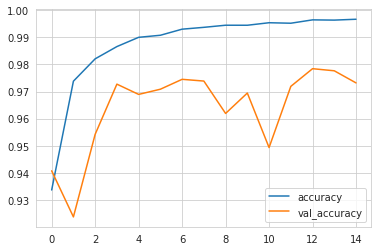

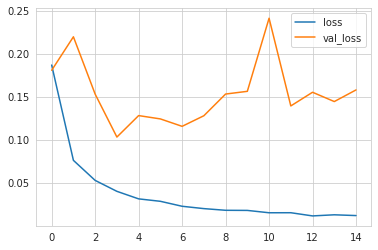

In [31]:
pd.DataFrame(history.history)

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [32]:
# Make Prediction
predict = model.predict(X_test)

In [33]:
# Predicted o/p will be in probability distribution 
predict

array([[1.0000000e+00, 1.8409859e-09, 2.2855669e-12, 1.9251124e-21,
        1.3875677e-16],
       [9.9984741e-01, 3.0849421e-07, 1.5226554e-04, 1.5992917e-11,
        4.2032058e-09],
       [1.0000000e+00, 1.6056789e-12, 3.7732362e-10, 3.5983988e-19,
        5.1137938e-10],
       ...,
       [5.2300236e-10, 2.7700702e-20, 1.2762366e-15, 4.2502977e-19,
        1.0000000e+00],
       [3.0498304e-22, 0.0000000e+00, 5.2942177e-29, 0.0000000e+00,
        1.0000000e+00],
       [1.6000289e-20, 2.7241101e-34, 1.3944434e-25, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [37]:
# distributional probability to integers
yhat = np.argmax(predict, axis = 1)
yhat

array([0, 0, 0, ..., 4, 4, 4])

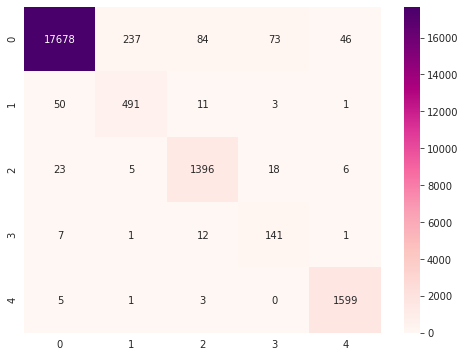

In [35]:
#argmax used to convert int
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(np.argmax(y_test, axis = 1), yhat)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), yhat), annot = True, fmt = '0.0f', cmap ='RdPu')



In [39]:
print(classification_report(np.argmax(y_test, axis = 1), yhat))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18118
           1       0.67      0.88      0.76       556
           2       0.93      0.96      0.95      1448
           3       0.60      0.87      0.71       162
           4       0.97      0.99      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.83      0.94      0.88     21892
weighted avg       0.98      0.97      0.97     21892

